In [110]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import requests
from bs4 import BeautifulSoup

## Scrapping the Dataset

In [3]:
url = "https://keras.io/api/applications/"

html = requests.get(url).text
soup = BeautifulSoup(html)

In [106]:
available_models = pd.DataFrame(columns=["Model", "Size (MB)", "Top-1 Accuracy", "Top-5 Accuracy",
                                         "Parameters", "Depth", "Time (ms) per inference step (CPU)",
                                         "Time (ms) per inference step (GPU)"])

In [107]:
for row in soup.h2.next_sibling.next_sibling.find_all("tr"):
    col = row.find_all(["td"])
    try:
        model = col[0].text.strip()
        size = col[1].text.strip()
        top1 = col[2].text.strip()
        top5 = col[3].text.strip()
        params = col[4].text.strip()
        depth = col[5].text.strip()
        cpu = col[6].text.strip()
        gpu = col[7].text.strip()

        #print(model, size, top1, top5, params, depth, cpu, gpu)
        available_models.loc[len(available_models.index)] = [model, size, top1, top5, params, depth, cpu, gpu]
    except:
        print("Null Value!! Ignored!!")

Null Value!! Ignored!!


## Load the Dataset

In [109]:
available_models.head()

,Model,Size (MB),Top-1 Accuracy,Top-5 Accuracy,Parameters,Depth,Time (ms) per inference step (CPU),Time (ms) per inference step (GPU)
0,Xception,88,79.0%,94.5%,22.9M,81,109.4,8.1
1,VGG16,528,71.3%,90.1%,138.4M,16,69.5,4.2
2,VGG19,549,71.3%,90.0%,143.7M,19,84.8,4.4
3,ResNet50,98,74.9%,92.1%,25.6M,107,58.2,4.6
4,ResNet50V2,98,76.0%,93.0%,25.6M,103,45.6,4.4


In [116]:
# Change some columns from onjects to float, so we can visualize it
columnss = ['Size (MB)','Parameters', 'Depth',
            'Time (ms) per inference step (CPU)',
            'Time (ms) per inference step (GPU)']

for col in columnss:
    # Remove commas and any non-digit characters (except for decimal point)
    available_models[col] = available_models[col].str.replace(',', '').str.replace('[^\d.]', '', regex=True)

    # Convert to float
    available_models[col] = pd.to_numeric(available_models[col], errors='coerce')

available_models.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Model                               38 non-null     object 
 1   Size (MB)                           38 non-null     float64
 2   Top-1 Accuracy                      38 non-null     object 
 3   Top-5 Accuracy                      38 non-null     object 
 4   Parameters                          38 non-null     float64
 5   Depth                               26 non-null     float64
 6   Time (ms) per inference step (CPU)  26 non-null     float64
 7   Time (ms) per inference step (GPU)  26 non-null     float64
dtypes: float64(5), object(3)
memory usage: 2.7+ KB


In [129]:
available_models.describe()

,Size (MB),Parameters,Depth,Time (ms) per inference step (CPU),Time (ms) per inference step (GPU)
count,38.000000,38.000000,26.000000,26.000000,26.000000
mean,196.193684,50.942105,236.230769,208.050000,11.030769
std,252.303697,66.873623,140.320293,345.783966,13.150871
min,14.000000,3.500000,16.000000,22.600000,3.400000
25%,43.500000,10.725000,113.250000,58.700000,4.975000
50%,98.000000,25.600000,209.500000,87.200000,6.500000
75%,229.000000,59.275000,331.500000,129.500000,8.625000
max,1310.000000,350.100000,533.000000,1578.900000,61.600000


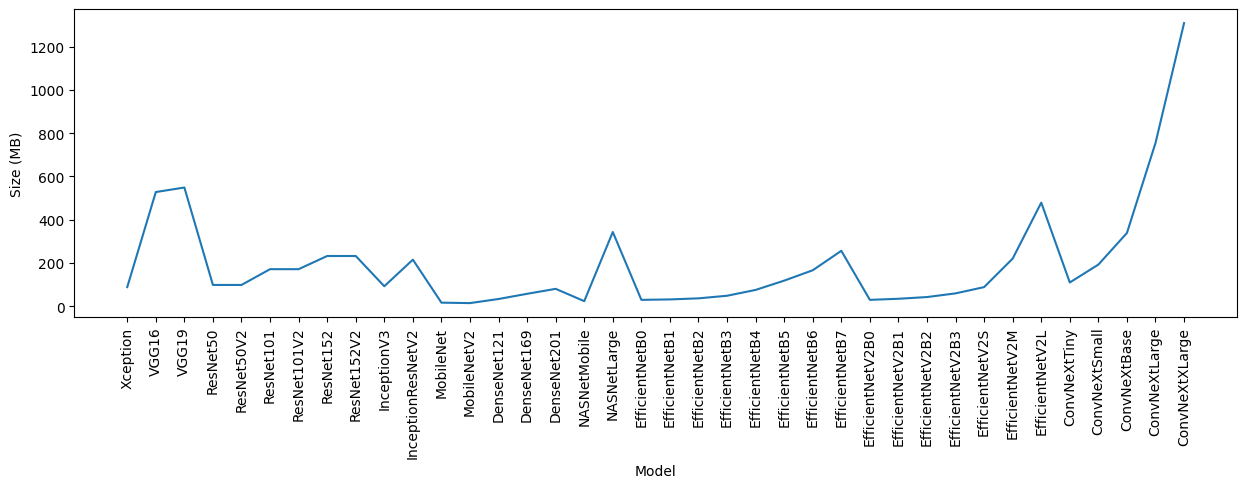

In [132]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="Model", y="Size (MB)", data=available_models)
plt.xticks(rotation=90)
plt.show()

## Normalization

In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
available_models_copy = available_models.copy()
available_models_copy[columnss] = scaler.fit_transform(available_models[columnss])

available_models_copy.head()

,Model,Size (MB),Top-1 Accuracy,Top-5 Accuracy,Parameters,Depth,Time (ms) per inference step (CPU),Time (ms) per inference step (GPU)
0,Xception,0.057099,79.0%,94.5%,0.055972,0.125725,0.055773,0.080756
1,VGG16,0.396605,71.3%,90.1%,0.389209,0.000000,0.030136,0.013746
2,VGG19,0.412809,71.3%,90.0%,0.404501,0.005803,0.039967,0.017182
3,ResNet50,0.064815,74.9%,92.1%,0.063762,0.176015,0.022875,0.020619
4,ResNet50V2,0.064815,76.0%,93.0%,0.063762,0.168279,0.014779,0.017182


In [131]:
available_models_copy.describe()

,Size (MB),Parameters,Depth,Time (ms) per inference step (CPU),Time (ms) per inference step (GPU)
count,38.000000,38.000000,26.000000,26.000000,26.000000
mean,0.140582,0.136879,0.425978,0.119161,0.131113
std,0.194679,0.192942,0.271413,0.222183,0.225960
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022762,0.020845,0.188104,0.023196,0.027062
50%,0.064815,0.063762,0.374275,0.041509,0.053265
75%,0.165895,0.160920,0.610251,0.068689,0.089777
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualization

Karna ada beberapa values yang NaN, maka kita bagi visualisasi jadi 2 bagian:
- visualisasi dengan membuang NaN, shg fokus pada column **Model, Size, Parameters, Depth, dan Time**.

- Visualisasi seluruh dataset, tapi hanya fokus pada columns **Model, Size dan Parameters**

In [174]:
available_models_copy.tail()

,Model,Size (MB),Top-1 Accuracy,Top-5 Accuracy,Parameters,Depth,Time (ms) per inference step (CPU),Time (ms) per inference step (GPU)
33,ConvNeXtTiny,0.073627,81.3%,-,0.072418,NaN,NaN,NaN
34,ConvNeXtSmall,0.137569,82.3%,-,0.134737,NaN,NaN,NaN
35,ConvNeXtBase,0.250448,85.3%,-,0.245239,NaN,NaN,NaN
36,ConvNeXtLarge,0.571813,86.3%,-,0.560300,NaN,NaN,NaN
37,ConvNeXtXLarge,1.000000,86.7%,-,1.000000,NaN,NaN,NaN


In [153]:
#available_models_copy.melt(id_vars=['Model']).Model.value_counts()

### Visualisasi ke-1

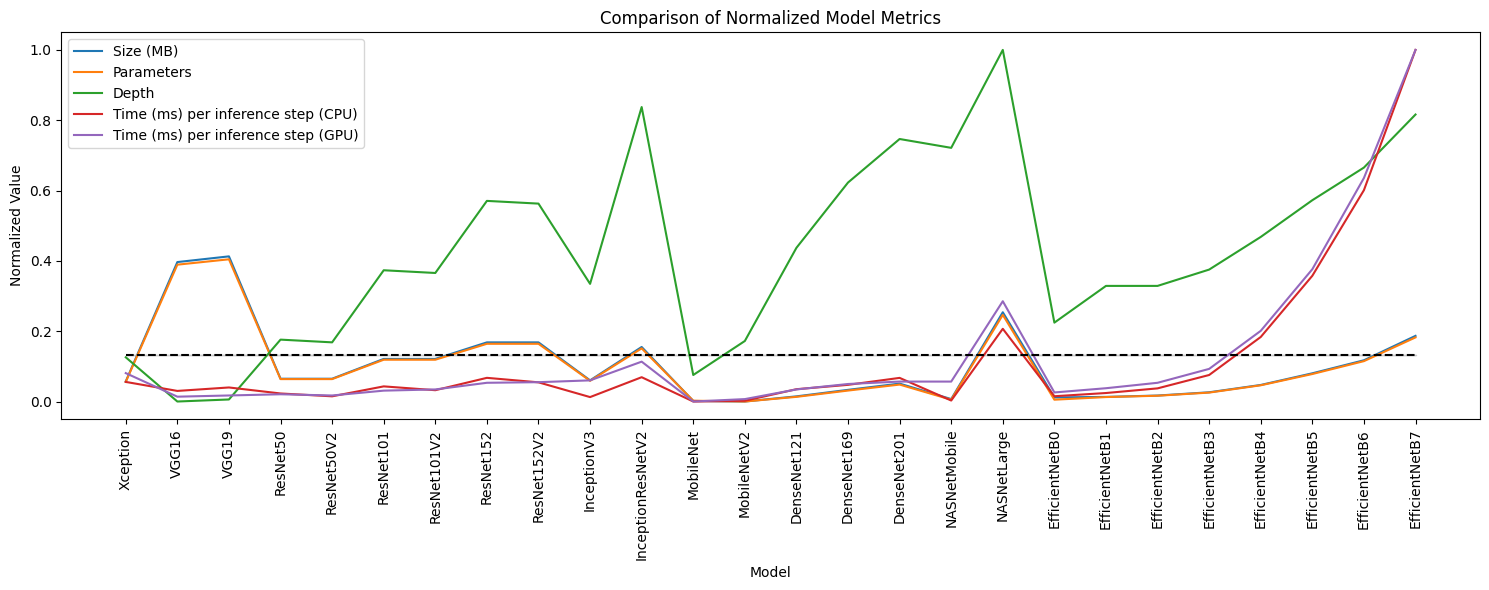

In [193]:
sample_for_visualize1 = available_models_copy.drop(columns=["Top-1 Accuracy", "Top-5 Accuracy"]).dropna()

# Melt the DataFrame to long format for easier plotting with seaborn
melted_df1 = sample_for_visualize1.melt(id_vars=['Model'], value_vars=sample_for_visualize1.columns.values,
                                        var_name='Metric', value_name='Value')

# Create the line plot
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
sns.lineplot(x='Model', y='Value', hue='Metric', data=melted_df1)

# Draw line for mean values
for metric in melted_df1['Metric'].unique():
    mean_value = melted_df1[melted_df1['Metric'] == metric]['Value'].mean()

sns.lineplot(x='Model', y=mean_value, data=melted_df1, color='black', linestyle='--')


plt.xticks(rotation=90)
plt.title('Comparison of Normalized Model Metrics')  # Add a title
plt.ylabel('Normalized Value')  # Add y-axis label
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### Visualisasi ke-2

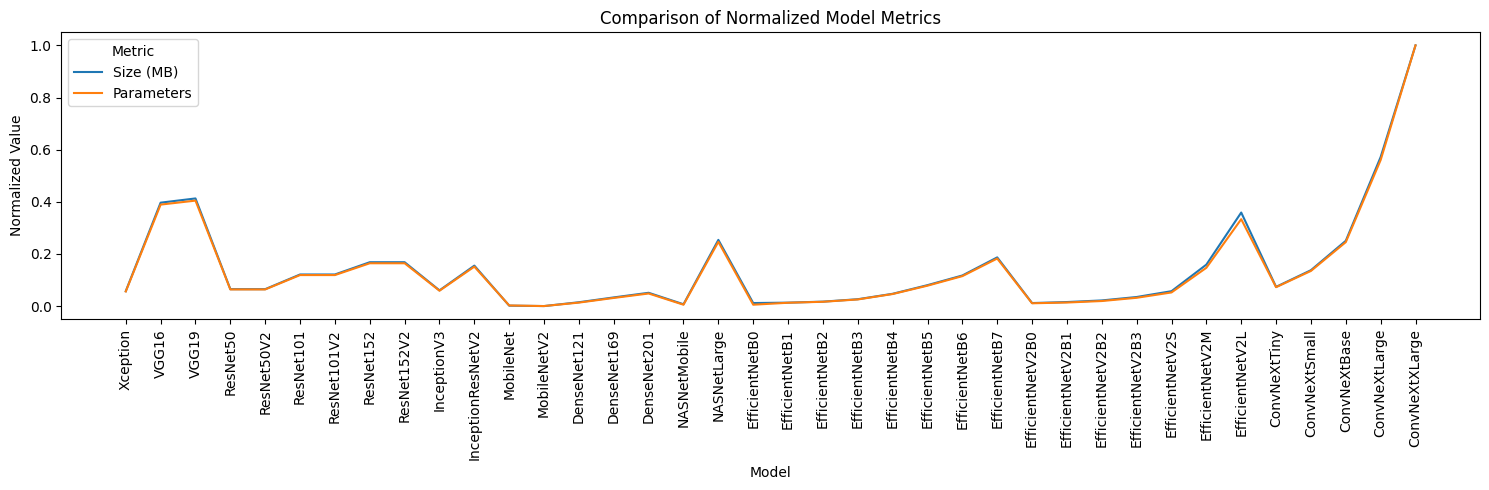

In [171]:
sample_for_visualize2 = available_models_copy[["Model","Size (MB)","Parameters"]]

# Melt the DataFrame to long format for easier plotting with seaborn
melted_df2 = sample_for_visualize2.melt(id_vars=['Model'], value_vars=sample_for_visualize2.columns.values,
                                        var_name='Metric', value_name='Value')

# Create the line plot
plt.figure(figsize=(15, 5))  # Adjust figure size as needed
sns.lineplot(x='Model', y='Value', hue='Metric', data=melted_df2)


plt.xticks(rotation=90)
plt.title('Comparison of Normalized Model Metrics')  # Add a title
plt.ylabel('Normalized Value')  # Add y-axis label
plt.tight_layout()  # Adjust layout for better spacing
plt.show()